#Misson 1



---



## 1-1. 각 메뉴를 클래스로 하는 분류 데이터 셋과 데이터 로더를 준비하고 예시 이미지를 클래스별로 하나씩 총 42 장을 한 번에 시각화한다.

### 한글 설치 및 라이브러리 임포트

In [ ]:
# 한글 설정하는 코드
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.4 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

## 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torch.utils.tensorboard import SummaryWriter
from torch.backends import cudnn
cudnn.benchmark = True

import torchvision
from torchvision import models
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

from torchsummary import summary
from tqdm import tqdm
from tqdm.notebook import tqdm
from datetime import datetime
import os

from warnings import filterwarnings
filterwarnings('ignore')

import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글 설정하는 코드 2
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic')


# 한글 설정하는 코드 3

print('설정되어있는 폰트 사이즈 : ', plt.rcParams['font.size'])
print('설정되어있는 폰트 글꼴 : ', plt.rcParams['font.family'])

설정되어있는 폰트 사이즈 :  10.0
설정되어있는 폰트 글꼴 :  ['NanumGothic']


###데이터 정규화

In [ ]:
transform_img =T.Compose(
    [T.Resize((244, 244)),
     T.ToTensor(),
     T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


train_img = ImageFolder(root='/content/drive/MyDrive/데이터/train', transform=transform_img)
val_img = ImageFolder(root='/content/drive/MyDrive/데이터/val', transform=transform_img)

train_class = train_img.classes
val_class = val_img.classes

print("train 클래스 개수 :", len(train_class), train_class)
print("val 클래스 개수 :", len(val_class), val_class)

train 클래스 개수 : 42 ['갈비구이', '갈치구이', '감자전', '경단', '계란국', '계란말이', '계란후라이', '고등어구이', '곱창구이', '김밥', '김치볶음밥', '김치전', '꿀떡', '누룽지', '닭갈비', '더덕구이', '동그랑땡', '떡갈비', '떡국_만두국', '무국', '미역국', '북엇국', '불고기', '비빔밥', '삼겹살', '새우볶음밥', '생선전', '송편', '시래기국', '알밥', '유부초밥', '육개장', '잡곡밥', '장어구이', '조개구이', '조기구이', '주먹밥', '콩나물국', '파전', '호박전', '황태구이', '훈제오리']
val 클래스 개수 : 42 ['갈비구이', '갈치구이', '감자전', '경단', '계란국', '계란말이', '계란후라이', '고등어구이', '곱창구이', '김밥', '김치볶음밥', '김치전', '꿀떡', '누룽지', '닭갈비', '더덕구이', '동그랑땡', '떡갈비', '떡국_만두국', '무국', '미역국', '북엇국', '불고기', '비빔밥', '삼겹살', '새우볶음밥', '생선전', '송편', '시래기국', '알밥', '유부초밥', '육개장', '잡곡밥', '장어구이'

###데이터 시각화

{0: '갈비구이', 1: '갈치구이', 2: '감자전', 3: '경단', 4: '계란국', 5: '계란말이', 6: '계란후라이', 7: '고등어구이', 8: '곱창구이', 9: '김밥', 10: '김치볶음밥', 11: '김치전', 12: '꿀떡', 13: '누룽지', 14: '닭갈비', 15: '더덕구이', 16: '동그랑땡', 17: '떡갈비', 18: '떡국_만두국', 19: '무국', 20: '미역국', 21: '북엇국', 22: '불고기', 23: '비빔밥', 24: '삼겹살', 25: '새우볶음밥', 26: '생선전', 27: '송편', 28: '시래기국', 29: '알밥', 30: '유부초밥', 31: '육개장', 32: '잡곡밥', 33: '장어구이', 34: '조개구이', 35: '조기구이', 36: '주먹밥', 37: '콩나물국', 38: '파전', 39: '호박전', 40: '황태구이', 41: '훈제오리'}


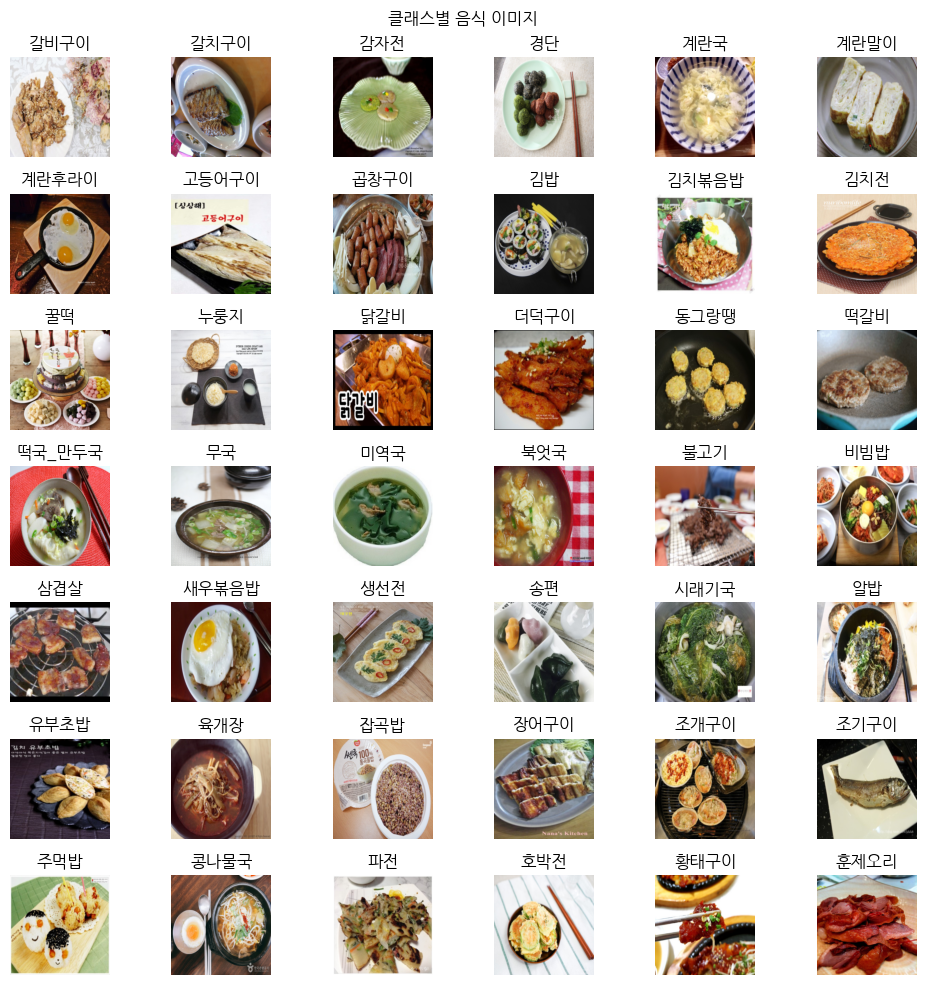

In [ ]:
classes_dict = {i: train_class[i] for i in range(len(train_class))}
print(classes_dict)

import random
import math
import unicodedata

fig = plt.figure(figsize = (10,10))
num_classes = len(classes_dict)
cols = 6
rows = math.ceil(num_classes / cols)

for i in range(num_classes):
    indices = [idx for idx, (_, label) in enumerate(train_img.imgs) if label == i]
    random_idx = random.choice(indices)

    img, label = train_img[random_idx]
    fig.add_subplot(rows, cols, i+1)

    # 한글 자음모음 분리 문제 해결
    title = classes_dict[label]
    title_nfd = unicodedata.normalize('NFD', title)
    title_nfc = unicodedata.normalize('NFC', title)
    plt.title(title_nfc)
    plt.axis('off')

    if img.dim()==3 and img.size(0) == 1: # 실제로는 흑백인데 컬러로 저장된 경우, squeeze로 첫 번째 차원 제거 => 제대로 흑백 이미지로 구분되도록 함
        img = img.squeeze(0)
        plt.imshow(img.numpy(), cmap='gray')

    elif img.dim()==3: # 컬러 이미지인 경우 unnormalize 하고 차원 순서 바꿔주기
        img = np.transpose((img/2 + 0.5).numpy(), (1, 2, 0))
        plt.imshow(img)

plt.suptitle('클래스별 음식 이미지')
plt.tight_layout()
plt.show()



---



## 1-2. ResNet18 을 활용하여 42종의 클래스 분류를 수행하고 Validation 데이터에 대한 정확도를 제시한다.

##함수 설정
본격적인 모델 학습에 앞서 앞으로 사용할 함수를 지정한다.

* pickle 저장 및 불러오기

In [ ]:
def save_pickle(data, route):
    '''
    data를 받아서 pickle 형식으로 저장
    '''
    with open(route, 'wb') as file:
        pickle.dump(data, file)
    print(f"{route} 저장 완료")

def load_pickle(route):
    '''
    저장된 pickle 파일을 불러오기
    '''
    with open(route, 'rb') as file:
        return pickle.load(file)

In [ ]:
def save_scores(scores):
    '''
    epoch별 train accuracy와 validation accuracy를 pickle 파일로 저장
    '''
    with open('scores.pickle', 'wb') as file:
        pickle.dump(scores, file)

def load_scores(route):
    '''
    epoch별 train accuracy와 validation accuracy가 저장된 파일을 불러오기
    '''
    with open(route, 'rb') as file:
        return pickle.load(file)

* 모델 저장 및 불러오기

In [ ]:
def save_model(model, optimizer, num_epochs, loss, accuracy_score):
    '''
    모델의 checkpoint를 '*.pt' 확장자 파일로 저장하는 함수
    '''
    # 모델을 저장할 경로를 지정하고 .pt 확장자를 사용
    model_save_path = 'Mission1.pt'

    # 모델의 상태 및 다른 중요한 정보를 저장
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': num_epochs,  # 현재 에폭
        'loss': loss.item()  # 현재 손실
    }

    torch.save(checkpoint, model_save_path)

def load_model(model, optimizer, model_path):
    '''
    저장된 모델 checkpoint를 불러오는 함수
    '''
    checkpoint = torch.load(model_path)

    # 모델의 상태 및 중요한 정보를 불러옴
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']

    return model, optimizer, epoch, loss

# 저장 경로는 때에 이용 목적에 따라 바꾸도록 한다

* 채점 시 사용하는 코드

In [ ]:
# 본인의 코드에 사용해도 된다.
@torch.no_grad()
def validate_epoch(model: nn.Module, testloader: torch.utils.data.dataloader, device: torch.device):
    ''' data_loader provides inputs and GTs.
        model receives input images from data_loader and produces logits.
        returns the accuracy of model in percent.
    '''
    model.eval()
    accuracies = []
    for images, labels in tqdm(testloader, total=len(testloader), mininterval=1, desc='measuring accuracy'):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        pred = torch.argmax(logits, dim=1)

        accuracies.append(pred == labels)

    accuracy = torch.cat(accuracies).float().mean() * 100
    return accuracy.item()

* 클래스 별 채점 코드

In [ ]:
# 클래스별 채점 코드
@torch.no_grad()
def validate_epoch_by_class(model: nn.Module, testloader: torch.utils.data.dataloader, device: torch.device):
    ''' data_loader provides inputs and GTs.
        model receives input images from data_loader and produces logits.
        returns the accuracy of model BY CLASSES in percent.
    '''
    # 초기 설정
    total_counts = {testloader.dataset.classes[i] : 0 for i in range(len(testloader.dataset.classes))}
    true_counts = {testloader.dataset.classes[i] : 0 for i in range(len(testloader.dataset.classes))}

    # 클래스별 채점 수행
    model.eval()
    for images, labels in tqdm(testloader, total=len(testloader), mininterval=1, desc='measuring accuracy'):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        pred = torch.argmax(logits, dim=1)

        results = pred == labels

        # tensor를 구성하는 각 원소의 라벨과 결과를 확인하여, 클래스별 정답 개수와 데이터 개수로 저장
        for i in range(len(results)):
            total_counts[testloader.dataset.classes[labels[i].item()]] += 1
            true_counts[testloader.dataset.classes[labels[i].item()]] += 1 if results[i].item() else 0

    # 데이터프레임으로 생성
    df = pd.merge(
        pd.DataFrame(total_counts, index=['total']).T.reset_index(),
        pd.DataFrame(true_counts, index=['true']).T.reset_index()
    )

    # accuracy 도출
    df['accuracy'] = df['true'] / df['total']

    return df.sort_values('accuracy', ascending=False).reset_index(drop=True)

* 구글 드라이브로 현재 디렉토리 변경하기 (코랩 이용시 런타임 다운과 함께 저장한 파일들이 사라지는 것을 막기 위함입니다)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/개별 폴더')

##데이터 변환하기

1) 데이터 변환 정의 하기

In [ ]:
# 데이터 변환 정의
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
])

# 데이터셋 로딩
trainset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/데이터/train', transform=transform)

# 데이터로더 생성
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

2) Train data의 평균, 표준편차 확인하기
* 해당 단계는 코드만 작성하고, 현 환경 아래에서 직접 실행은 진행하지 않으며 대신 미리 저장된 피클을 첨부하는 걸로 실행을 대신한다.

In [ ]:
# 평균과 표준편차 계산
mean = 0.0
std = 0.0
for images, _ in trainloader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)

mean /= len(trainloader.dataset)
std /= len(trainloader.dataset)

normalize_params = {"평균": mean, "표준편차": std}

print(normalize_params)

In [ ]:
# 평균과 표준편차 저장
now = datetime.now().strftime('%y%m%d%H%M%S')
save_route = f"{now}_normalize-params.pickle"
save_pickle(normalize_params, save_route)

3) 저장된 평균과 표준편차로 이미지 전처리하기

[normalize 된 피클 링크](https://drive.google.com/file/d/10Lcr6CnSIjHTV4mgAmUtY0-yD8ltIxiN/view?usp=drive_link)

*해당 파일은 미리 수행 후 저장된 피클, 아래의 코드에서는 해당 파일을 이용해 수행함.*

In [ ]:
# 저장된 평균, 표준편차 로딩
load_route = '/content/drive/MyDrive/데이터 병합 관련/231031172524_normalize-params.pickle'
mean = load_pickle(load_route)['평균']
std = load_pickle(load_route)['표준편차']

# 데이터 변환 정의
transform = T.Compose([
    T.Resize((224, 224)),  # 이미지 크기 조정
    T.ToTensor(),  # 이미지를 텐서로 변환
    T.Normalize(mean=mean, std=std)  # 이미지 정규화
])

In [ ]:
# 데이터셋 로딩
trainset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/데이터/train', transform=transform)
testset =  torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/데이터/val', transform=transform)

# 데이터로더 생성
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

##ResNet 18 로 분류하기

###ResNet 18 모델 생성하기

In [ ]:
# ResNet-18 모델 로딩
model = models.resnet18(pretrained=False)

# 분류할 클래스 수에 맞게 모델의 출력 레이어 수정
num_classes = len(trainset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# CUDA 사용
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(device)

cuda:0


In [ ]:
# 시드 설정
seed = 42
torch.manual_seed(seed)  # PyTorch 무작위 시드 설정
np.random.seed(seed)     # NumPy 무작위 시드 설정

# GPU 시드 설정
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [ ]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

### 모델 학습시키기
* 해당 단계는 코드만 작성하고, 현 환경 아래에서 직접 실행은 진행하지 않으며 대신 미리 제작된 체크포인트 제출로 코드 실행을을 대신한다.

In [ ]:
# 손실 함수 정의
criterion = torch.nn.CrossEntropyLoss()

# 최적화 알고리즘 선택
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)

# 스케줄러 정의
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.95 ** epoch)

# 훈련 반복
max_val_accuracy = 0
num_epochs = 100
scores = {}
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(tqdm(trainloader, desc=f'Epoch {epoch+1}/{num_epochs}')):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    avg_loss = running_loss / (i + 1)
    accuracy = 100.0 * correct / total
    print(f'Epoch {epoch+1} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

    # 매 epoch에서 validation accuracy 계산
    val_accuracy = validate_epoch(model, testloader, device)

    # accuracy를 저장
    scores[epoch] = [accuracy, val_accuracy]
    if val_accuracy > max_val_accuracy:
        max_val_accuracy = val_accuracy
        save_model(model, optimizer, epoch, loss, val_accuracy)

    # 스케줄러 업데이트
    scheduler.step()

print('Training Finished')

now = datetime.now().strftime('%y%m%d%H%M%S')
save_route = f"{now}_scores.pickle"
save_pickle(scores, save_route)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
save_model(model, optimizer, epoch, loss, val_accuracy)

##Validation 정확도 확인

* 해당 단계는 제출한 체크포인트를 불러와 검증하는 것으로 진행한다.

### 모델 불러오기

In [ ]:
# 모델과 옵티마이저를 초기화
model = models.resnet18(pretrained=False)
num_classes = len(trainset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
optimizer = torch.optim.Adam(model.parameters())

# 저장된 모델을 불러오기
model_path = '/content/drive/MyDrive/데이터 병합 관련/Mission1.pt'
model, optimizer, epoch, loss = load_model(model, optimizer, model_path)

# CUDA 사용
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(device)

# 시드 설정
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# GPU 시드 설정
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

cuda:0


In [ ]:
validate_epoch(model, testloader, device)

measuring accuracy:   0%|          | 0/66 [00:00<?, ?it/s]

72.96331787109375